# Install Qiskit and Import Packages

In [0]:
!pip3 install qiskit

import qiskit
from qiskit.aqua import run_algorithm
from qiskit.aqua.input import LinearSystemInput
from qiskit.quantum_info import state_fidelity
from qiskit.aqua.algorithms.classical import ExactLSsolver

from qiskit import BasicAer
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms.single_sample import HHL
from qiskit.aqua.utils import random_hermitian

import numpy as np
import scipy.stats as stats
import scipy.sparse as sparse
import matplotlib.pyplot as plt

np.random.seed(43)

     |████████████████████████████████| 1.5MB 5.0MB/s 
     |████████████████████████████████| 21.3MB 1.7MB/s 
     |████████████████████████████████| 61kB 29.3MB/s 
     |████████████████████████████████| 81kB 29.2MB/s 
     |████████████████████████████████| 409kB 57.2MB/s 
     |████████████████████████████████| 522kB 57.7MB/s 
     |████████████████████████████████| 51kB 23.3MB/s 
     |████████████████████████████████| 51kB 24.6MB/s 
     |████████████████████████████████| 51kB 27.8MB/s 
     |████████████████████████████████| 5.3MB 38.5MB/s 
     |████████████████████████████████| 71kB 29.5MB/s 
     |████████████████████████████████| 532kB 44.3MB/s 
     |████████████████████████████████| 21.5MB 32.3MB/s 
     |████████████████████████████████| 2.3MB 42.8MB/s 
     |████████████████████████████████| 61kB 32.5MB/s 
     |████████████████████████████████| 61kB 27.6MB/s 
     |████████████████████████████████| 102kB 34.2MB/s 
  Created wheel for qiskit: filename=qiskit-0.11.1-cp36-

# Create Random Sparse Hermitian Matrix


In [0]:
def random_sparse_matrix(n, density):        # Generate Random Sparse Matrix of N*N shape and given density 
    rvs = stats.norm().rvs
    X = sparse.random(n, n, density=density, data_rvs=rvs)
    upper_X = sparse.triu(X) 
    result = upper_X + upper_X.T - sparse.diags(X.diagonal())
    assert (result - result.T).nnz == 0      # check that the matrix is symmetric. The difference should have no non-zero elements
    return result


def random_sparse_hermitian_matrix(n,density):
    M = random_sparse_matrix(n,density)
    A = M.toarray()
    B = A + A.conj().T    # a matrix plus it's hermitian is a hermitian matrix
    return B 

ele = []

def elements(el):                            # this function will keep the information about all outputs generated later
    ele.append(el)

# Solving linear systems of equations with the HHL algorithm

In [0]:
def print_circuit_depth_and_width(result):
    print("Circuit_width: ", result['circuit_info']['width'])
    print("Circuit_depth: ", result['circuit_info']['depth'])
    return (result['circuit_info']['width'],result['circuit_info']['depth'])

def fidelity(hhl, ref):
    solution_hhl_normed = hhl / np.linalg.norm(hhl)
    solution_ref_normed = ref / np.linalg.norm(ref)
    fidelity = state_fidelity(solution_hhl_normed, solution_ref_normed)
    print("fidelity %f" % fidelity)
    return fidelity

In [0]:
params = {
    'problem': {
        'name': 'linear_system'
    },
    'algorithm': {
        'name': 'HHL'
    },
    'eigs': {
        'expansion_mode': 'suzuki',
        'expansion_order': 2,
        'name': 'EigsQPE',
        'num_ancillae': 3,
        'num_time_slices': 50
    },
    'reciprocal': {
        'name': 'Lookup'
    },
    'backend': {
        'provider': 'qiskit.BasicAer',
        'name': 'statevector_simulator'
    }
}

## 2*2 Diagonal Matrix

In [0]:
matrix = [[1, 0], [0, 2]]
vector = [1, 4]
params['input'] = {
    'name': 'LinearSystemInput',
    'matrix': matrix,
    'vector': vector
}

In [0]:
result = run_algorithm(params)
print("solution ", np.round(result['solution'], 5))

result_ref = ExactLSsolver(matrix, vector).run()
print("classical solution ", np.round(result_ref['solution'], 5))

print("probability %f" % result['probability_result'])
fid = fidelity(result['solution'], result_ref['solution'])

/usr/local/lib/python3.6/dist-packages/qiskit/providers/ibmq/ibmqfactory.py:547: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/qiskit/providers/ibmq/ibmqfactory.py:547: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)


solution  [1.05859+0.j 1.99245+0.j]
classical solution  [1. 2.]
probability 0.024630
fidelity 0.999389


In [0]:
circ = print_circuit_depth_and_width(result)

Circuit_width:  7
Circuit_depth:  12256


In [0]:
# make the dictionary of the matrix

diagonal_params_2 = {
    'Probability': result['probability_result'],
    'Fidelity': fid,
    'Circuit': circ,
    'Name': 'diagonal_params_2'
}

elements(diagonal_params_2)

## 2*2 non-diagonal matrix

In [0]:
matrix = [[1, 3], [3, 2]]
vector = [1, 1]

params3 = params
params3['input'] = {
    'name': 'LinearSystemInput',
    'matrix': matrix,
    'vector': vector
}
params3['reciprocal'] = {
    'negative_evals': True
}
params3['eigs'] = {
    'negative_evals': True
}

In [0]:
result = run_algorithm(params3)
print("solution ", np.round(result['solution'], 5))

result_ref = ExactLSsolver(matrix, vector).run()
print("classical solution ", np.round(result_ref['solution'], 5))

print("probability %f" % result['probability_result'])
fid = fidelity(result['solution'], result_ref['solution'])

/usr/local/lib/python3.6/dist-packages/qiskit/providers/ibmq/ibmqfactory.py:547: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/qiskit/providers/ibmq/ibmqfactory.py:547: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)


solution  [0.14223-5.e-05j 0.28622+7.e-05j]
classical solution  [0.14286 0.28571]
probability 0.000316
fidelity 0.999994


In [0]:
circ = print_circuit_depth_and_width(result)

Circuit_width:  11
Circuit_depth:  73313


In [0]:
# make the dictionary of the matrix

nondiagonal_params_2 = {
    'Probability': result['probability_result'],
    'Fidelity': fid,
    'Circuit': circ,
    'Name': 'nondiagonal_params_2'
}

elements(nondiagonal_params_2)

## 8x8 non-diagonal matrix

In [0]:
matrix = [[4, 0, 0, 0, 0, 0, 0, 1],
          [0, 3, 0, 0, 0, 0, 0, 0],
          [0, 0, 8, 0, 0, 0, 0, 0],
          [0, 0, 0, 5, 0, 0, 0, 0],
          [0, 0, 0, 0, 2, 1, 0, 0],
          [0, 0, 0, 0, 1, 1, 0, 0],
          [0, 0, 0, 0, 0, 0, 1, 0],
          [1, 0, 0, 0, 0, 0, 0, 5]]
vector = [1, 0, 0, 0, 0, 0, 0, 1]
params4 = params
params4['input'] = {
    'name': 'LinearSystemInput',
    'matrix': matrix,
    'vector': vector
}

In [0]:
result = run_algorithm(params4)
print("solution ", np.round(result['solution'], 5))

result_ref = ExactLSsolver(matrix, vector).run()
print("classical solution ", np.round(result_ref['solution'], 5))

print("probability %f" % result['probability_result'])
fid = fidelity(result['solution'], result_ref['solution'])

/usr/local/lib/python3.6/dist-packages/qiskit/providers/ibmq/ibmqfactory.py:547: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/qiskit/providers/ibmq/ibmqfactory.py:547: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)


solution  [ 0.21016+0.j  0.     +0.j  0.     +0.j  0.     +0.j  0.     +0.j
 -0.     +0.j -0.     -0.j  0.1582 -0.j]
classical solution  [0.21053 0.      0.      0.      0.      0.      0.      0.15789]
probability 0.001002
fidelity 0.999997


In [0]:
circ = print_circuit_depth_and_width(result)

Circuit_width:  13
Circuit_depth:  738340


In [0]:
# make the dictionary of the matrix

nondiagonal_params_8 = {
    'Probability': result['probability_result'],
    'Fidelity': fid,
    'Circuit': circ,
    'Name': 'nondiagonal_params_8'
}

elements(nondiagonal_params_8)

## 8*8 Diagonal Matrix

In [0]:
matrix = [[4, 0, 0, 0, 0, 0, 0, 0],
          [0, 3, 0, 0, 0, 0, 0, 0],
          [0, 0, 8, 0, 0, 0, 0, 0],
          [0, 0, 0, 5, 0, 0, 0, 0],
          [0, 0, 0, 0, 2, 0, 0, 0],
          [0, 0, 0, 0, 0, 1, 0, 0],
          [0, 0, 0, 0, 0, 0, 1, 0],
          [0, 0, 0, 0, 0, 0, 0, 5]]
vector = [1, 0, 0, 0, 0, 0, 0, 1]
params4 = params
params4['input'] = {
    'name': 'LinearSystemInput',
    'matrix': matrix,
    'vector': vector
}

In [0]:
result = run_algorithm(params4)
print("solution ", np.round(result['solution'], 5))

result_ref = ExactLSsolver(matrix, vector).run()
print("classical solution ", np.round(result_ref['solution'], 5))

print("probability %f" % result['probability_result'])
fid = fidelity(result['solution'], result_ref['solution'])

/usr/local/lib/python3.6/dist-packages/qiskit/providers/ibmq/ibmqfactory.py:547: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/qiskit/providers/ibmq/ibmqfactory.py:547: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)


solution  [0.24927+0.j 0.     +0.j 0.     +0.j 0.     +0.j 0.     +0.j 0.     +0.j
 0.     +0.j 0.20059+0.j]
classical solution  [0.25 0.   0.   0.   0.   0.   0.   0.2 ]
probability 0.000982
fidelity 0.999992


In [0]:
circ = print_circuit_depth_and_width(result)

Circuit_width:  13
Circuit_depth:  248342


In [0]:
# make the dictionary of the matrix

diagonal_params_8 = {
    'Probability': result['probability_result'],
    'Fidelity': fid,
    'Circuit': circ,
    'Name': 'diagonal_params_8'
}
elements(diagonal_params_8)

## 4x4 Non-diagonal randomly-generated matrix 

In [0]:
params5 = params
params5['algorithm'] = {
    'truncate_powerdim': False,
    'truncate_hermitian': False
}
params5['reciprocal'] = {
    'name': 'Lookup',
    'negative_evals': True
}
params5['eigs'] = {
    'expansion_mode': 'suzuki',
    'expansion_order': 2,
    'name': 'EigsQPE',
    'negative_evals': True,
    'num_ancillae': 6,
    'num_time_slices': 70
}
params5['initial_state'] = {
    'name': 'CUSTOM'
}
params5['iqft'] = {
    'name': 'STANDARD'
}
params5['qft'] = {
    'name': 'STANDARD'
}

In [0]:
matrix = random_hermitian(4)
vector = [1, 2, 3, 1]

print("random matrix:")
m = np.array(matrix)
print(np.round(m, 3))

algo_input = LinearSystemInput(matrix=matrix, vector=vector)
hhl = HHL.init_params(params5, algo_input)
backend = BasicAer.get_backend('statevector_simulator')
quantum_instance = QuantumInstance(backend=backend)
result = hhl.run(quantum_instance)
print("solution ", np.round(result['solution'], 5))

result_ref = ExactLSsolver(matrix, vector).run()
print("classical solution ", np.round(result_ref['solution'], 5))

print("probability %f" % result['probability_result'])
fid = fidelity(result['solution'], result_ref['solution'])

random matrix:
[[ 0.786+0.j     0.107-0.071j -0.056-0.152j -0.165-0.044j]
 [ 0.107+0.071j  0.83 +0.j     0.176+0.077j -0.033+0.129j]
 [-0.056+0.152j  0.176-0.077j  0.334-0.j     0.093+0.051j]
 [-0.165+0.044j -0.033-0.129j  0.093-0.051j  0.552+0.j   ]]
solution  [ 2.40416+2.73931j  0.3257 -1.61977j 10.72586-0.34047j  1.36743+1.67322j]
classical solution  [ 2.40896+2.70987j  0.34046-1.61083j 10.67383-0.38112j  1.38202+1.65516j]
probability 0.005583
fidelity 0.999994


In [0]:
circ = print_circuit_depth_and_width(result)

Circuit_width:  12
Circuit_depth:  973521


In [0]:
# make the dictionary of the matrix

nondiagonal_params_4 = {
    'Probability': result['probability_result'],
    'Fidelity': fid,
    'Circuit': circ,
    'Name': 'nondiagonal_params_4'
}
elements(nondiagonal_params_4)

## 4*4 Diagonal Matrix

In [0]:
matrix = [  [ 0.786+0.j     ,        0         ,      0         ,      0],
            [ 0             ,    0.83 +0.j     ,      0         ,      0],
            [ 0             ,        0         ,  0.334-0.j     ,      0],
            [ 0             ,        0         ,      0         ,  0.552+0.j]  ]
vector = [1, 2, 3, 1]

print("random matrix:")
m = np.array(matrix)
print(np.round(m, 3))

algo_input = LinearSystemInput(matrix=matrix, vector=vector)
hhl = HHL.init_params(params5, algo_input)
backend = BasicAer.get_backend('statevector_simulator')
quantum_instance = QuantumInstance(backend=backend)
result = hhl.run(quantum_instance)
print("solution ", np.round(result['solution'], 5))

result_ref = ExactLSsolver(matrix, vector).run()
print("classical solution ", np.round(result_ref['solution'], 5))

print("probability %f" % result['probability_result'])
fid = fidelity(result['solution'], result_ref['solution'])

random matrix:
[[0.786+0.j 0.   +0.j 0.   +0.j 0.   +0.j]
 [0.   +0.j 0.83 +0.j 0.   +0.j 0.   +0.j]
 [0.   +0.j 0.   +0.j 0.334+0.j 0.   +0.j]
 [0.   +0.j 0.   +0.j 0.   +0.j 0.552+0.j]]
solution  [1.27413+0.j 2.4138 +0.j 8.97434+0.j 1.81038+0.j]
classical solution  [1.27226+0.j 2.40964+0.j 8.98204+0.j 1.81159+0.j]
probability 0.001285
fidelity 1.000000


In [0]:
circ = print_circuit_depth_and_width(result)

Circuit_width:  12
Circuit_depth:  130723


In [0]:
# make the dictionary of the matrix

diagonal_params_4 = {
    'Probability': result['probability_result'],
    'Fidelity': fid,
    'Circuit': circ,
    'Name': 'diagonal_params_4'
}
elements(diagonal_params_4)

In [0]:
print(ele)

[{'Probability': 0.02462968466484279, 'Fidelity': 0.9993886637768511, 'Circuit': (7, 12256), 'Name': 'diagonal_params_2'}, {'Probability': 0.00031603500306912573, 'Fidelity': 0.9999938758457477, 'Circuit': (11, 73313), 'Name': 'nondiagonal_params_2'}, {'Probability': 0.0010020651530008172, 'Fidelity': 0.9999968262519785, 'Circuit': (13, 738340), 'Name': 'nondiagonal_params_8'}, {'Probability': 0.0009815877702259298, 'Fidelity': 0.999991801260599, 'Circuit': (13, 248342), 'Name': 'diagonal_params_8'}, {'Probability': 0.005583121066501396, 'Fidelity': 0.9999938637567294, 'Circuit': (12, 973521), 'Name': 'nondiagonal_params_4'}, {'Probability': 0.0012852992565193918, 'Fidelity': 0.9999995230857985, 'Circuit': (12, 130723), 'Name': 'diagonal_params_4'}, {'Probability': 0.03323013047742795, 'Fidelity': 0.12106894273079506, 'Circuit': (7, 2054), 'Name': 'density_params_2'}]


## Random Sparse Hermitian Matrix



### Density 0.5

#### Shape 2*2

In [0]:
params = {
    'problem': {
        'name': 'linear_system'
    },
    'algorithm': {
        'name': 'HHL'
    },
    'eigs': {
        'expansion_mode': 'suzuki',
        'expansion_order': 2,
        'name': 'EigsQPE',
        'num_ancillae': 3,
        'num_time_slices': 50
    },
    'reciprocal': {
        'name': 'Lookup'
    },
    'backend': {
        'provider': 'qiskit.BasicAer',
        'name': 'statevector_simulator'
    }
}

In [0]:
x = random_sparse_hermitian_matrix(2,0.5)
x = x.tolist()
vector = [1, 4]
params['input'] = {
    'name': 'LinearSystemInput',
    'matrix': x,
    'vector': vector
}
print(x)

[[-3.9925891130337505, -1.041308694968361], [-1.041308694968361, 0.0]]


In [0]:
result = run_algorithm(params)
print("solution ", np.round(result['solution'], 5))

result_ref = ExactLSsolver(x, vector).run()
print("classical solution ", np.round(result_ref['solution'], 5))

print("probability %f" % result['probability_result'])
fid = fidelity(result['solution'], result_ref['solution'])

/usr/local/lib/python3.6/dist-packages/qiskit/providers/ibmq/ibmqfactory.py:547: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/qiskit/providers/ibmq/ibmqfactory.py:547: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)


solution  [0.73088+0.j 1.08917+0.j]
classical solution  [-3.84132 13.76807]
probability 0.099122
fidelity 0.422602


In [0]:
circ = print_circuit_depth_and_width(result)

Circuit_width:  7
Circuit_depth:  30254


In [0]:
density_params_2 = {
    'Probability': result['probability_result'],
    'Fidelity': fid,
    'Circuit': circ,
    'Name': 'density_params_2'
}
elements(density_params_2)

#### Shape 4*4

In [0]:
x = random_sparse_hermitian_matrix(4,0.5)
x = x.tolist()
vector = [1, 2, 3, 1]
params['input'] = {
    'name': 'LinearSystemInput',
    'matrix': x,
    'vector': vector
}
print(x)

[[0.0, 0.0, 1.780539219796637, -2.104176549877987], [0.0, 0.0, 0.0, 0.004462006650995319], [1.780539219796637, 0.0, 1.3629544177740913, 4.009063727851144], [-2.104176549877987, 0.004462006650995319, 4.009063727851144, -2.7256762443972247]]


In [0]:
result = run_algorithm(params)
print("solution ", np.round(result['solution'], 5))

result_ref = ExactLSsolver(x, vector).run()
print("classical solution ", np.round(result_ref['solution'], 5))

print("probability %f" % result['probability_result'])
fid = fidelity(result['solution'], result_ref['solution'])

/usr/local/lib/python3.6/dist-packages/qiskit/providers/ibmq/ibmqfactory.py:547: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/qiskit/providers/ibmq/ibmqfactory.py:547: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)


solution  [ 5.4247e-01-0.j -2.0000e-04+0.j  9.2328e-01+0.j  2.3181e-01+0.j]
classical solution  [-1.41344884e+03 -8.68952996e+05  5.30262170e+02  4.48228830e+02]
probability 0.135214
fidelity 0.000000


In [0]:
circ = print_circuit_depth_and_width(result)

Circuit_width:  8
Circuit_depth:  165262


In [0]:
density_params_4 = {
    'Probability': result['probability_result'],
    'Fidelity': fid,
    'Circuit': circ,
    'Name': 'density_params_4'
}
elements(density_params_4)

#### Shape 8*8

In [0]:
x = random_sparse_hermitian_matrix(8,0.5)
x = x.tolist()
vector = [1, 0, 0, 0, 0, 0, 0, 1]
params['input'] = {
    'name': 'LinearSystemInput',
    'matrix': x,
    'vector': vector
}
print(x)

[[0.0, -2.785843077824771, 0.0, -0.0012046470780860134, -0.47659462742997244, 0.8175438103235502, -1.0227795829221893, 0.0], [-2.785843077824771, 2.2922822082339094, 0.0, 0.0, 0.0, 0.0, 0.138964207019234, -2.444926335886532], [0.0, 0.0, 3.7333335839743786, 0.0, 0.0, 0.0, 1.81110037932207, 3.6890885206142308], [-0.0012046470780860134, 0.0, 0.0, 0.0, -0.7465764694177346, -1.8107709702074826, 0.8981523331401593, 2.5378372397022915], [-0.47659462742997244, 0.0, 0.0, -0.7465764694177346, 0.030208534151563646, 0.0, 0.0, 0.0], [0.8175438103235502, 0.0, 0.0, -1.8107709702074826, 0.0, 0.0, 0.0, -1.8658082688707], [-1.0227795829221893, 0.138964207019234, 1.81110037932207, 0.8981523331401593, 0.0, 0.0, 0.0, 2.720100292244544], [0.0, -2.444926335886532, 3.6890885206142308, 2.5378372397022915, 0.0, -1.8658082688707, 2.720100292244544, 0.21965732442139177]]


In [0]:
result = run_algorithm(params)
print("solution ", np.round(result['solution'], 5))

result_ref = ExactLSsolver(x, vector).run()
print("classical solution ", np.round(result_ref['solution'], 5))

print("probability %f" % result['probability_result'])
fid = fidelity(result['solution'], result_ref['solution'])

/usr/local/lib/python3.6/dist-packages/qiskit/providers/ibmq/ibmqfactory.py:547: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/qiskit/providers/ibmq/ibmqfactory.py:547: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)


solution  [ 0.1641 -0.j -0.11951+0.j -0.00188-0.j  0.01459-0.j -0.00169-0.j
 -0.00152+0.j -0.00455-0.j  0.15253-0.j]
classical solution  [-0.11852 -0.25834  0.08327  0.05447 -0.52378  0.0899   0.04181 -0.10479]
probability 0.087196
fidelity 0.000453


In [0]:
circ = print_circuit_depth_and_width(result)

Circuit_width:  9
Circuit_depth:  801281


In [0]:
density_params_8 = {
    'Probability': result['probability_result'],
    'Fidelity': fid,
    'Circuit': circ,
    'Name': 'density_params_8'
}
elements(density_params_8)

In [0]:
print(ele)

[{'Probability': 0.09912177755728116, 'Fidelity': 0.422602140608949, 'Circuit': (7, 30254), 'Name': 'density_params_2'}, {'Probability': 0.13521380264978825, 'Fidelity': 1.397700321478028e-12, 'Circuit': (8, 165262), 'Name': 'density_params_4'}, {'Probability': 0.08719559183485319, 'Fidelity': 0.00045310384745803116, 'Circuit': (9, 801281), 'Name': 'density_params_8'}]


### Density 1

#### Shape 2*2

In [0]:
x = random_sparse_hermitian_matrix(2,1)
x = x.tolist()
vector = [1, 4]
params['input'] = {
    'name': 'LinearSystemInput',
    'matrix': x,
    'vector': vector
}
print(x)

[[-1.4164170308920576, 0.5416608105842974], [0.5416608105842974, 2.5880758132463413]]


In [0]:
result = run_algorithm(params)
print("solution ", np.round(result['solution'], 5))

result_ref = ExactLSsolver(x, vector).run()
print("classical solution ", np.round(result_ref['solution'], 5))

print("probability %f" % result['probability_result'])
fid = fidelity(result['solution'], result_ref['solution'])

/usr/local/lib/python3.6/dist-packages/qiskit/providers/ibmq/ibmqfactory.py:547: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/qiskit/providers/ibmq/ibmqfactory.py:547: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)


solution  [0.43338-0.e+00j 1.50056-1.e-05j]
classical solution  [-0.10644  1.56783]
probability 0.028234
fidelity 0.883097


In [0]:
circ = print_circuit_depth_and_width(result)

Circuit_width:  7
Circuit_depth:  30254


In [0]:
density_params_2_1 = {
    'Probability': result['probability_result'],
    'Fidelity': fid,
    'Circuit': circ,
    'Name': 'density_params_2_1'
}
elements(density_params_2_1)

#### Shape 4*4

In [0]:
x = random_sparse_hermitian_matrix(4,1)
x = x.tolist()
vector = [1, 2, 3, 1]
params['input'] = {
    'name': 'LinearSystemInput',
    'matrix': x,
    'vector': vector
}
print(x)

[[-0.7050883842871706, 1.6489533586401084, -4.6673284361571366, -1.1217381566023612], [1.6489533586401084, 3.2336329288433094, 1.9850244553333656, -0.3641402760175156], [-4.6673284361571366, 1.9850244553333656, -2.0872141871782603, -0.07332467760550722], [-1.1217381566023612, -0.3641402760175156, -0.07332467760550722, 0.6150728862341979]]


In [0]:
result = run_algorithm(params)
print("solution ", np.round(result['solution'], 5))

result_ref = ExactLSsolver(x, vector).run()
print("classical solution ", np.round(result_ref['solution'], 5))

print("probability %f" % result['probability_result'])
fid = fidelity(result['solution'], result_ref['solution'])

/usr/local/lib/python3.6/dist-packages/qiskit/providers/ibmq/ibmqfactory.py:547: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/qiskit/providers/ibmq/ibmqfactory.py:547: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)


solution  [-0.-0.01851j -0.-0.56073j -0.-0.65816j -0.-0.08851j]
classical solution  [-0.0661   1.09051 -0.32658  2.11195]
probability 0.146572
fidelity 0.077870


In [0]:
circ = print_circuit_depth_and_width(result)

Circuit_width:  8
Circuit_depth:  165262


In [0]:
density_params_4_1 = {
    'Probability': result['probability_result'],
    'Fidelity': fid,
    'Circuit': circ,
    'Name': 'density_params_4_1'
}
elements(density_params_4_1)

#### Shape 8*8

In [0]:
x = random_sparse_hermitian_matrix(8,1)
x = x.tolist()
vector = [1, 0, 0, 0, 0, 0, 0, 1]
params['input'] = {
    'name': 'LinearSystemInput',
    'matrix': x,
    'vector': vector
}
print(x)

[[-0.03855278614095819, -0.46964775930783176, -0.8382922889103988, 0.8883254784128338, 0.7603128667589899, 0.01978863099557941, 2.180214170266153, 1.2046003341361413], [-0.46964775930783176, 0.49163051669644126, -1.8280478506255597, 2.41935046932938, 1.128848155072947, -0.6053685462532906, 3.9356411848211157, -1.2859496893922653], [-0.8382922889103988, -1.8280478506255597, 3.20087026939353, 1.4199706651166757, 0.22921965888526702, 0.6517419287617656, 0.903931192320679, -2.633236842331782], [0.8883254784128338, 2.41935046932938, 1.4199706651166757, 2.342771420663054, -0.8774838826226122, -3.1787187807940045, -0.21414760906208097, 1.0243480166193142], [0.7603128667589899, 1.128848155072947, 0.22921965888526702, -0.8774838826226122, 2.0245403470580685, -5.163538362484147, -3.884231811419563, 0.6537413136345654], [0.01978863099557941, -0.6053685462532906, 0.6517419287617656, -3.1787187807940045, -5.163538362484147, 1.2519654030852687, -0.7882363447575667, -1.4674303204862773], [2.180214170

In [0]:
result = run_algorithm(params)
print("solution ", np.round(result['solution'], 5))

result_ref = ExactLSsolver(x, vector).run()
print("classical solution ", np.round(result_ref['solution'], 5))

print("probability %f" % result['probability_result'])
fid = fidelity(result['solution'], result_ref['solution'])

/usr/local/lib/python3.6/dist-packages/qiskit/providers/ibmq/ibmqfactory.py:547: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/qiskit/providers/ibmq/ibmqfactory.py:547: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)


solution  [ 0.12072-0.j  0.00769-0.j -0.18409-0.j  0.03774-0.j -0.0483 +0.j
 -0.02266+0.j -0.00345-0.j  0.18906+0.j]
classical solution  [ 4.28927  0.35324  1.12618 -1.652    1.06836  0.20839  1.58715 -0.44321]
probability 0.152713
fidelity 0.004737


In [0]:
circ = print_circuit_depth_and_width(result)

Circuit_width:  9
Circuit_depth:  801281


In [0]:
density_params_8_1 = {
    'Probability': result['probability_result'],
    'Fidelity': fid,
    'Circuit': circ,
    'Name': 'density_params_8_1'
}
elements(density_params_8_1)

# Compare Results

In [0]:
# Keep every track of every output here 

print(ele)

In [0]:
d = {
    'Diagonal': {
        '2X2': 0.024630,
        '4X4': 0.005583,
        '8X8': 0.000982
    },
    'Non-diagonal': {
        '2X2': 0.000316,
        '4X4': 0.001285,
        '8X8': 0.001002
    }
}

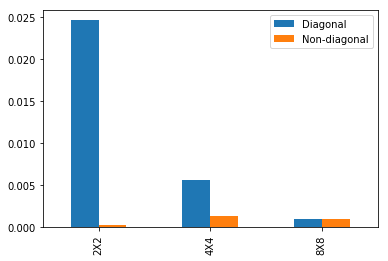

In [0]:
import matplotlib.pyplot as plt
import pandas as pd


pd.DataFrame(d).plot(kind='bar')
plt.show()

In [0]:
d = {
    'Diagonal': {
        '2X2': 7,
        '4X4': 12,
        '8X8': 13
    },
    'Non-diagonal': {
        '2X2': 11,
        '4X4': 12,
        '8X8': 13
    }
}

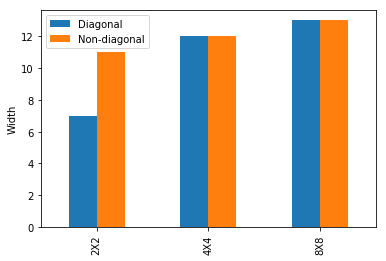

In [0]:
ax = pd.DataFrame(d).plot(kind='bar')
ax.set_ylabel("Width")
plt.show()

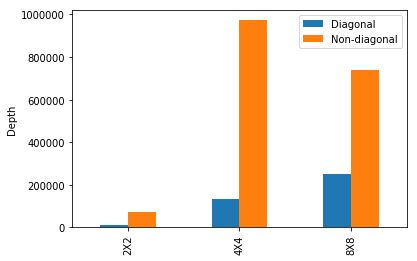

In [0]:
d = {
    'Diagonal': {
        '2X2': 12256,
        '4X4': 130723,
        '8X8': 248342
    },
    'Non-diagonal': {
        '2X2': 73313,
        '4X4': 973521,
        '8X8': 738340
    }
}

ax = pd.DataFrame(d).plot(kind='bar')
ax.set_ylabel("Depth")
plt.show()

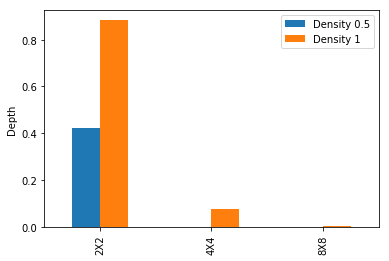

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

d = {
    'Density 0.5': {
        '2X2': 0.422602,
        '4X4': 0.000011,
        '8X8': 0.000453
    },
    'Density 1': {
        '2X2': 0.883097,
        '4X4': 0.077870,
        '8X8': 0.004737
    }
}

ax = pd.DataFrame(d).plot(kind='bar')
ax.set_ylabel("Depth")
plt.show()

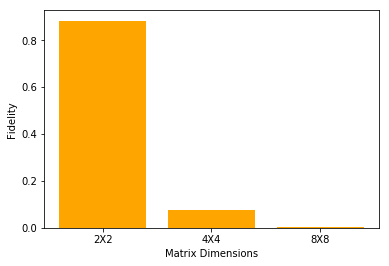

In [0]:
import numpy as np
import matplotlib.pyplot as plt
 
height = [0.883097, 0.077870, 0.004737]
bars = ('2X2', '4X4', '8X8')
y_pos = np.arange(len(bars))
 
plt.bar(y_pos, height, color = 'orange')
# plt.title('My title')
plt.xlabel('Matrix Dimensions')
plt.ylabel('Fidelity')
 
plt.xticks(y_pos, bars)
 
plt.show()


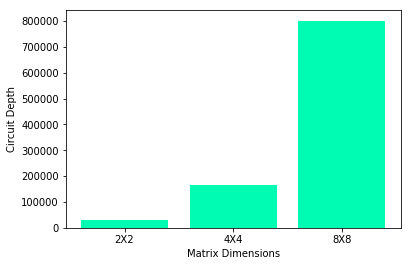

In [0]:
import numpy as np
import matplotlib.pyplot as plt
 
height = [30254, 165262, 801281]
bars = ('2X2', '4X4', '8X8')
y_pos = np.arange(len(bars))
 
plt.bar(y_pos, height, color = (0.0,0.99,0.7,1))
# plt.title('My title')
plt.xlabel('Matrix Dimensions')
plt.ylabel('Circuit Depth')
 
plt.xticks(y_pos, bars)
 
plt.show()
